# Programa de capacitação

**Introdução à comunicações digitais**

Adolfo Fernandes Herbster

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2019

# Atividade 04 - aplicação - Dual-Tone Multi-Frequency

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as num
from IPython.display import Audio
import scipy.integrate as integrate

In [29]:
def dft(xn, fftLen=None):
    if fftLen is None:
        fftLen = len(xn)
    return num.fft.fftshift(num.fft.fft(xn, fftLen))

Nesta atividade, vamos considerar o sistema de discagem **Dual-Tone Multi-Frequency** - [DTMF](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling "Wikipedia Page"). Neste sistema, utilizado em telefonia, ao teclar um número, é possível escutar um som, diferente para cada tecla. Assim, cada som é gerado por uma tecla diferente, formada por dois tons. Matematicamente:
 $$x(t)=\cos(2\pi f_1 t) + \cos(2\pi f_2 t),$$
em que $f_1$ e $f_2$ dependem do dígito discado. As frequências são codificadas de acordo com a seguinte tabela:

|       | 1209Hz | 1336Hz | 1477Hz | 1633Hz |
|-------|--------|--------|--------|-------:|
| 697Hz |    1   |    2   |    3   |   A    |
| 770Hz |    4   |    5   |    6   |   B    |
| 852Hz |    7   |    8   |    9   |   C    |
| 941Hz |    *   |    0   |    #   |   D    |

Então, por exemplo, quando o número 5 é discado, o sinal descrito como
$$x_5(t)=\cos(2\pi f_1 t) + \cos(2\pi f_2 t), \quad\text{com } f_1=770Hz \quad f_2=1336Hz$$ é gerado.

In [30]:
F1 = num.array([697, 770, 852, 941])
F2 = num.array([1209, 1336, 1477, 1633])
tones = {'1': (0,0),
        '2': (0,1),
        '3': (0,2),
        '4': (1,0),
        '5': (1,1),
        '6': (1,2),
        '7': (2,0),
        '8': (2,1),
        '9': (2,2),
        '0': (3,1),
        '*': (3,0),
        '#': (3,2),
        'A': (0,3),
        'B': (1,3),
        'C': (2,3),
        'D': (3,3)}
for number, inds in sorted(tones.items()):
    print ("%s: %dHz %dHz (delta-F: %dHz)" % (number, F1[inds[0]], F2[inds[1]], (F2[inds[1]]-F1[inds[0]])))

#: 941Hz 1477Hz (delta-F: 536Hz)
*: 941Hz 1209Hz (delta-F: 268Hz)
0: 941Hz 1336Hz (delta-F: 395Hz)
1: 697Hz 1209Hz (delta-F: 512Hz)
2: 697Hz 1336Hz (delta-F: 639Hz)
3: 697Hz 1477Hz (delta-F: 780Hz)
4: 770Hz 1209Hz (delta-F: 439Hz)
5: 770Hz 1336Hz (delta-F: 566Hz)
6: 770Hz 1477Hz (delta-F: 707Hz)
7: 852Hz 1209Hz (delta-F: 357Hz)
8: 852Hz 1336Hz (delta-F: 484Hz)
9: 852Hz 1477Hz (delta-F: 625Hz)
A: 697Hz 1633Hz (delta-F: 936Hz)
B: 770Hz 1633Hz (delta-F: 863Hz)
C: 852Hz 1633Hz (delta-F: 781Hz)
D: 941Hz 1633Hz (delta-F: 692Hz)


In [31]:
Fs = 8000  # taxa de amostragem do nosso sistema
def tone(number, duration):
    """Gera o som para cada tecla de acordo com a duração"""
    inds = tones[number]
    f1 = F1[inds[0]]
    f2 = F2[inds[1]]
    
    t = num.arange(0, duration, 1/Fs)
    return num.cos(2*num.pi*f1*t) + num.cos(2*num.pi*f2*t)  # calcula o sinal

# Gera o sinal para o dígito 2 com a duração de 1s.
Audio(data=tone(number='2', duration=1), rate=Fs)

Considere, agora, uma função que concatena vários dígitos.

In [32]:
def dialNumber(numbers, toneDuration):
    data = [tone(n, toneDuration) for n in numbers]
    return num.hstack(data)
Audio(data=dialNumber("8321011148", toneDuration=0.2), rate=Fs)

In [33]:
def markPossibleTones():
    for f in F1:
        plt.axvline(f, color='r')
    for f in F2:
        plt.axvline(f, color='k')
        plt.xlabel("Frequêcia [Hz]", fontsize = 14);
        plt.ylabel("x[n]", fontsize = 14);

## 1. Gere um sinal com duração igual a 0,01s que representa o dígito "7". Em seguida, ilustre o espectro deste sinal.

In [34]:
data = tone ...
f = num.arange(-Fs/2, Fs/2, Fs/len(data))

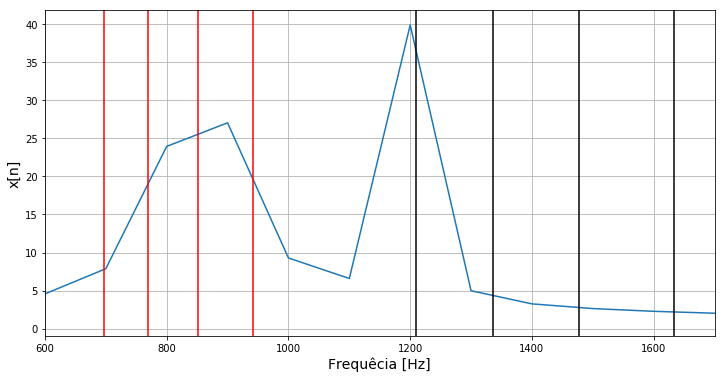

In [35]:
plt.figure(figsize=(12,6));
plt.plot(f, ...);
markPossibleTones();
plt.xlim((600, 1700));
plt.grid(True);

## 2. Você observará que os tons (componentes com maior energia do espectro) não corresponde àqueles para o dígito "7". Isto significa que você deverá adicionar valores nulos ao sinal para melhorar sua precisão. Faça esta operação com o sinal gerado no item anterior e ilustre novamente o espectro deste sinal. Quais as componentes que você visualiza?

## 3. Desenvolva uma função que estime qual tecla foi utilizada para gerar o sinal baseada na análise espectral.

## 4. Desenvolva uma função que estime qual conjunto de teclas foi discada, baseada na função desenvolvida no item 3. Para pulsos de curta duração, por exemplo, 1/500 s, sua função ainda detecta a sequência corretamente?